<a href="https://colab.research.google.com/github/KOWilliams/KOWilliams/blob/main/Eye_Diseases_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Eye Diseases Classification dataset and it is located at https://www.kaggle.com/datasets/gunavenkatdoddi/eye-diseases-classification

In [2]:
!pip install kaggle
# The command pip install kaggle

In [3]:
from google.colab import files
files.upload()
# This line of code is used to upload files from
# the local machine to the Colab environment.

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kehindeoluwaseun","key":"34b8688e556df9e46dd1bf0ae96b6056"}'}

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
# The set of code above are used to set up the Kaggle API key on my computer.
# The purpose of these commands is to create a directory named .kaggle
# in the home directory, we move the Kaggle API key file (kaggle.json) into
# that directory, and set the appropriate permissions to ensure that only
# the owner has read and write access to the API key file.
# This is done for security reasons to protect your Kaggle API credentials
# from unauthorized access. The Kaggle API key is used to authenticate and
# interact with the Kaggle platform programmatically.

In [6]:
!kaggle datasets download -d gunavenkatdoddi/eye-diseases-classification

100% 736M/736M [00:24<00:00, 26.9MB/s]
100% 736M/736M [00:24<00:00, 31.6MB/s]


In [7]:
!unzip eye-diseases-classification -d eye-diseases-classification

Archive:  eye-diseases-classification.zip
  inflating: eye-diseases-classification/dataset/cataract/0_left.jpg  
  inflating: eye-diseases-classification/dataset/cataract/103_left.jpg  
  inflating: eye-diseases-classification/dataset/cataract/1062_right.jpg  
  inflating: eye-diseases-classification/dataset/cataract/1083_left.jpg  
  inflating: eye-diseases-classification/dataset/cataract/1084_right.jpg  
  inflating: eye-diseases-classification/dataset/cataract/1102_left.jpg  
  inflating: eye-diseases-classification/dataset/cataract/1102_right.jpg  
  inflating: eye-diseases-classification/dataset/cataract/1115_left.jpg  
  inflating: eye-diseases-classification/dataset/cataract/1126_right.jpg  
  inflating: eye-diseases-classification/dataset/cataract/112_right.jpg  
  inflating: eye-diseases-classification/dataset/cataract/1144_left.jpg  
  inflating: eye-diseases-classification/dataset/cataract/1144_right.jpg  
  inflating: eye-diseases-classification/dataset/cataract/1164_left.j

In [13]:
import pandas as pd
import numpy as np
import cv2
import os

def load_and_preprocess_images(folder, label, image_size=(128, 128)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        if filename.endswith('.jpg'):
            img = cv2.imread(os.path.join(folder, filename))
            img = cv2.resize(img, image_size)
            images.append(img)
            labels.append(label)
    return images, labels

# Define Image Folders
cataract_folder = '/content/eye-diseases-classification/dataset/cataract'
diabetic_retinopathy_folder = '/content/eye-diseases-classification/dataset/diabetic_retinopathy'
glaucoma_folder = '/content/eye-diseases-classification/dataset/glaucoma'
normal_folder = '/content/eye-diseases-classification/dataset/normal'
# We are initializing the lists to store images and labels
images = []
labels = []
# We Load and pre-process cataract Dataset images (Man)
for filename in os.listdir(cataract_folder):
    if filename.endswith('.jpg'):
        img = cv2.imread(os.path.join(cataract_folder, filename))
        img = cv2.resize(img, (128, 128))  # Resize the image to a common size
        images.append(img)
        labels.append(0)  # 0 represents cataract
# We Load and pre-process diabetic_retinopathy Dataset images (Diabetic Retinopathy)
for filename in os.listdir(diabetic_retinopathy_folder):
    if filename.endswith('.jpg'):
        img = cv2.imread(os.path.join(diabetic_retinopathy_folder, filename))
        img = cv2.resize(img, (128, 128))  # Resize the image to a common size
        images.append(img)
        labels.append(1)  # 1 represents diabetic_retinopathy
# We Load and pre-process glaucoma Dataset images (Glaucoma)
for filename in os.listdir(glaucoma_folder):
    if filename.endswith('.jpg'):
        img = cv2.imread(os.path.join(glaucoma_folder, filename))
        img = cv2.resize(img, (128, 128))  # Resize the image to a common size
        images.append(img)
        labels.append(2)  # 2 represents glaucoma
# We Load and pre-process Normal Dataset images (Normal)
for filename in os.listdir(normal_folder):
    if filename.endswith('.jpg'):
        img = cv2.imread(os.path.join(normal_folder, filename))
        img = cv2.resize(img, (128, 128))  # Resize the image to a common size
        images.append(img)
        labels.append(3)  # 3 represents normal
# We Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)


In [14]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [27]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# Assuming we have already loaded and pre-processed data
# (x_train, y_train, x_test, y_test)

# Definition of the model
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')])  # 4 classes: Cataract, Diabetic Retinopathy, Glaucoma and Normal

# Compilation of the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training of the model
history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/30
73/73 [==============================] - 68s 912ms/step - loss: 17.2519 - accuracy: 0.4987 - val_loss: 0.8765 - val_accuracy: 0.6216
Epoch 2/30
73/73 [==============================] - 69s 929ms/step - loss: 0.8128 - accuracy: 0.6440 - val_loss: 0.7827 - val_accuracy: 0.6644
Epoch 3/30
73/73 [==============================] - 60s 819ms/step - loss: 0.7266 - accuracy: 0.6855 - val_loss: 0.7416 - val_accuracy: 0.6849
Epoch 4/30
73/73 [==============================] - 61s 842ms/step - loss: 0.6709 - accuracy: 0.7074 - val_loss: 0.7186 - val_accuracy: 0.6901
Epoch 5/30
73/73 [==============================] - 60s 824ms/step - loss: 0.6334 - accuracy: 0.7335 - val_loss: 0.7527 - val_accuracy: 0.6661
Epoch 6/30
73/73 [==============================] - 60s 821ms/step - loss: 0.5930 - accuracy: 0.7524 - val_loss: 0.7014 - val_accuracy: 0.6849
Epoch 7/30
73/73 [==============================] - 67s 905ms/step - loss: 0.5561 - accuracy: 0.7661 - val_loss: 0.7116 - val_accuracy: 0.710

In [28]:
from PIL import Image
import numpy as np

# Load the new image
new_image_path = '/content/eye-diseases-classification/dataset/glaucoma/1020_left.jpg'
# Replace with the actual path to your new image
new_image = Image.open(new_image_path)

# Resize the image to match the input size expected by your model
input_size = (128, 128)  # Adjust this size based on your model's input size
new_image = new_image.resize(input_size)

# Convert the PIL image to a NumPy array and normalize pixel values if needed
new_image_array = np.array(new_image) / 255.0

# Making predictions on the new image
predictions = model.predict(np.expand_dims(new_image_array, axis=0))
predicted_label = np.argmax(predictions)

# Interpret the label using your dataset's class labels
class_labels = ['Cataract', 'Diabetic Retinopathy', 'Glaucoma', 'Normal']
predicted_class = class_labels[predicted_label]

# Display the prediction
print(f'Predicted class: {predicted_class}')

# Close the image
new_image.close()

1/1 [==============================] - 0s 192ms/step
Predicted class: Glaucoma


In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 64)                3

19/19 [==============================] - 5s 270ms/step


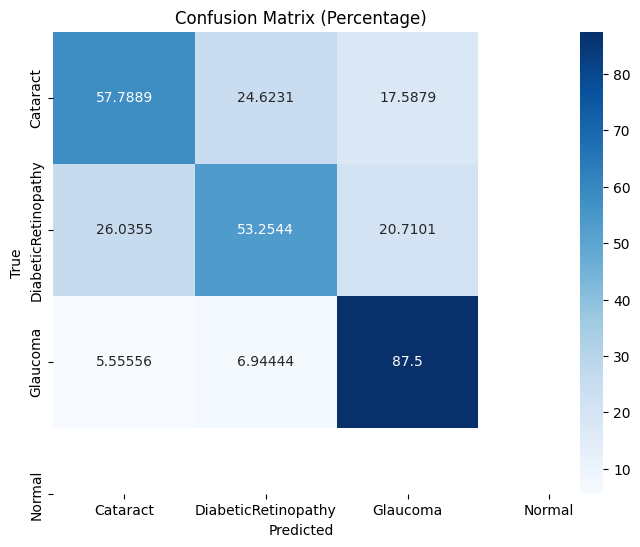

                     precision    recall  f1-score   support

           Cataract       0.67      0.58      0.62       199
DiabeticRetinopathy       0.58      0.53      0.56       169
           Glaucoma       0.73      0.88      0.80       216

           accuracy                           0.67       584
          macro avg       0.66      0.66      0.66       584
       weighted avg       0.67      0.67      0.67       584



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2326: UserWarning: labels size, 3, does not match size of target_names, 4
  warnings.warn(


In [49]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion_matrix(model, x_test, y_test, class_names=None, normalize=False):
    # Get predicted probabilities from the model
    predicted_probabilities = model.predict(x_test)

    # Convert predicted probabilities to class labels
    predicted_labels = np.argmax(predicted_probabilities, axis=1)

    # Get unique labels dynamically
    unique_labels = np.unique(np.concatenate((y_test, predicted_labels)))

    # Create the confusion matrix
    conf_matrix = confusion_matrix(y_test, predicted_labels, labels=unique_labels)

    # Normalize the confusion matrix if specified
    if normalize:
        conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1, keepdims=True) * 100

    # Display the confusion matrix using a heatmap with % symbol
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix (Percentage)' if normalize else 'Confusion Matrix')
    plt.show()

    # Display classification report
    class_report = classification_report(y_test, predicted_labels, labels=unique_labels,
                                         target_names=class_names, zero_division=1)
    print(class_report)

# Assuming 'model', 'x_test', 'y_test', and 'class_names' are properly defined
class_names = ['Cataract', 'DiabeticRetinopathy', 'Glaucoma', 'Normal']
plot_confusion_matrix(model, x_test, y_test, class_names=class_names, normalize=True)


In [42]:
IndexError                                Traceback (most recent call last)
<ipython-input-41-f65a53424651> in <cell line: 49>()
     47 # Assuming 'model', 'x_test', 'y_test', and 'class_names' are properly defined
     48 class_names = ['Cataract', 'Diabetic Retinopathy', 'Glaucoma', 'Normal']  # Replace with your actual class names
---> 49 plot_confusion_matrix(model, x_test, y_test, class_names=class_names, normalize=True)

<ipython-input-41-f65a53424651> in plot_confusion_matrix(model, x_test, y_test, class_names, normalize)
     33     for i in range(len(class_names)):
     34         for j in range(len(class_names)):
---> 35             plt.text(j + 0.5, i + 0.5, custom_format(conf_matrix[i, j], normalize),
     36                      ha='center', va='center', color='black')
     37     plt.xlabel('Predicted')

IndexError: index 3 is out of bounds for axis 1 with size 3

SyntaxError: invalid syntax (<ipython-input-42-833372dd46e0>, line 1)